# Title of Project

## INFO 1998 Final Project

### Benjamin Tang and Dylan Tom and Grant Rineheimer

This project performs an explorative data and predictive analysis on a used car dataset. 

We want to answer the following questions
1. What features can we use to predict the price of a used car? We want to explore if time of year affects sale price. (Regression)
2. Given certain features, can we predict the manufacturer of the car? (Classification)

The approach is outlined as follows:
1. Preprocessing and cleaning the dataset
2. Data Visualization
3. Machine Learning Models
4. Analysis

Source of Data: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

In [4]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import Dataset
data = pd.read_csv('vehicles.csv')
df = pd.DataFrame(data)
df.shape

FileNotFoundError: [Errno 2] No such file or directory: 'vehicles.csv'

This dataset has 426,880 instances with 26 features. Shown below are the names of the attributes and the first 5 rows of the dataframe. There are many rows which have NaN as an entry which do not provide additional features to determine a correlation or make predictions. For example, 'url', 'region_url', 'image url', 'description' are outdated and non-useful columns which can be removed to make the dataframe easier to read. 

In [13]:
%pprint
list(df.columns)

Pretty printing has been turned ON


['id',
 'url',
 'region',
 'region_url',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'image_url',
 'description',
 'county',
 'state',
 'lat',
 'long',
 'posting_date']

In [14]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


## Data Preprocessing and Cleaning

The entries in this dataset are very noisy. There are many NaN values, redundant or insiginficantly useful columns, and potentially repetition of data entries. In a dataset of 426,880 entries, the useful data must be extracted and preprocessed. 

SUBSETTING: We begin the data preprocessing by removing the following attributes which contain URLs which will not be processed in this dataset. 

In [15]:
df_useful = df.drop(['url','region_url','image_url','description','county'], axis=1) 

In [16]:
#Number of unique values in manufacturer, condition, fuel,type, paint_color, drive
df_useful.nunique(axis=0)

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64

In [17]:
#Curious in the attributes with at most 15 unique values (<= 15)
print('unique conditions: ', df_useful.condition.unique())
print('unique cylinders: ', df_useful.cylinders.unique())
print('unique fuel types: ', df_useful.fuel.unique())
print('unique titles: ', df_useful.title_status.unique())
print('unique transmissions: ', df_useful.transmission.unique())
print('unique drives: ', df_useful.drive.unique())
print('unique types: ', df_useful.type.unique())
print('unique size: ', df_useful['size'].unique())
print('unique paint: ', df_useful.paint_color.unique())

unique conditions:  [nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
unique cylinders:  [nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
unique fuel types:  [nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
unique titles:  [nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
unique transmissions:  [nan 'other' 'automatic' 'manual']
unique drives:  [nan 'rwd' '4wd' 'fwd']
unique types:  [nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'bus' 'van' 'convertible' 'wagon']
unique size:  [nan 'full-size' 'mid-size' 'compact' 'sub-compact']
unique paint:  [nan 'white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow'
 'orange' 'green' 'custom' 'purple']


In [18]:
#DID NOT USE
def condense(df):
    """
    Modifies the dataframe to condense the number of "similar" terms
    
    Example: "good" = ['good', 'fair']
    
    Parameter df: A dataframe to modify
    Precondition: df is a dataframe containing columns with categorical data
    """
    
    good = ["good", "fair"]
    excellent = ["excellent", "like new"]
    
    for i in range(len(df)):
        if df['condition'][i] in good:
            df['condition'][i] = 'good'
        elif df['condition'][i] in excellent:
            df['condition'][i] = 'excellent'

In [19]:
def str_to_int(df):
    """
    Modifies the dataframe to convert a string to an int
    
    Example: 8 cylinders -> 8 
    
    Parameter df: A dataframe to modify 
    Precondition: Dataframe with at least 1 column with a string containing at least one digit
    """
    
    for i in range(len(df)):
        string_cylinder = df['cylinders'][i]
        if type(string_cylinder) == str and string_cylinder != 'other':
            df['cylinders'][i] = int(string_cylinder[0])

In [20]:
def convert_date(df):
    """
    Modifies the dataframe to format the posting date, DO NOT need time
    
    Example: 2021-05-04T12:31:18-0500 -> 05/04/2021
    
    Parameter df: A dataframe to modify 
    Precondition: Dataframe with a date column in the above format
    """
    
    for i in range(len(df)):
        s = df['posting_date'][i]
        
        if type(s) == str:
            year = s[:4]
            month = s[5:7]
            day = s[8:10]

            df['posting_date'][i] = month + '/' + day + '/' + year

In [21]:
#Inefficient but allows control over what variables are overwritten or modified
#condense(df_useful)
str_to_int(df_useful)
convert_date(df_useful)

/Users/benjamin.0t/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/benjamin.0t/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
df_useful.to_csv('modified_vehicles.csv')

NameError: name 'df_useful' is not defined

In [58]:
# Use as checkpoint
df_useful = pd.read_csv('modified_vehicles.csv')

The categorical data in this dataset are: manufacturer, model, conditions, fuel, title_status, transmission, drive, size, type, paint_color

The continuous data in this dataset are: price, year, cylinders, odometer, posting-date


FILTERING: to modify the dataset to include only useful rows

In [59]:
#Number of null values in each column in dataframe
df_useful.isna().sum()

Unnamed: 0           0
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [60]:
#Need to choose which rows to drop
df_final = df_useful.dropna(subset = ['year','cylinders'])

#Reindex the dataframe
df_final.reset_index(drop=True, inplace=True)

#Retained 
df_final.shape

(248084, 22)

In [61]:
df_final['year'] = df_final['year'].astype(int)

<ipython-input-61-98260ffd4044>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['year'] = df_final['year'].astype(int)


In [62]:
df_final.describe()

,Unnamed: 0,id,price,year,odometer,lat,long
count,248084.000000,2.480840e+05,2.480840e+05,248084.000000,2.465850e+05,242819.000000,242819.000000
mean,212541.074910,7.311672e+09,6.629931e+04,2010.330275,1.045731e+05,38.652560,-95.509484
std,123601.834573,4.308408e+06,1.242535e+07,9.815420,2.114410e+05,5.932695,18.644916
min,27.000000,7.301584e+09,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.827728
25%,104962.750000,7.308403e+09,5.500000e+03,2007.000000,4.700000e+04,34.746623,-114.465026
50%,213805.500000,7.312860e+09,1.199900e+04,2013.000000,9.439500e+04,39.338500,-89.600000
75%,320034.250000,7.315307e+09,2.499000e+04,2016.000000,1.400000e+05,42.484503,-81.152649
max,426878.000000,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,82.252826,173.885502


In [63]:
df_final.head()

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,...,transmission,VIN,drive,size,type,paint_color,state,lat,long,posting_date
0,27,7316814884,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8,gas,...,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al,32.590,-85.4800,05/04/2021
1,28,7316814758,auburn,22590,2010,chevrolet,silverado 1500,good,8,gas,...,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al,32.590,-85.4800,05/04/2021
2,29,7316814989,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8,gas,...,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al,32.590,-85.4800,05/04/2021
3,30,7316743432,auburn,30990,2017,toyota,tundra double cab sr,good,8,gas,...,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al,32.590,-85.4800,05/04/2021
4,31,7316356412,auburn,15000,2013,ford,f-150 xlt,excellent,6,gas,...,automatic,NaN,rwd,full-size,truck,black,al,32.592,-85.5189,05/03/2021


In [64]:
def encode_dummies(df, column):
    """
    Encodes dummies for column on DataFrame df.
    Parameter column: String name of column to be encoded as dummies
    Parameter df: DataFrame that is receiving dummies
    Requires: column is of type String and is a column (axis=1) in df, df is a DataFrame
    """
    dummies = pd.get_dummies(df[column], prefix=column, dummy_na=True)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop([column], axis=1)
    return df

In [65]:
df_final = encode_dummies(df=df_final, column='fuel')
df_final = encode_dummies(df=df_final, column='size')
df_final = encode_dummies(df=df_final, column='condition')
df_final = encode_dummies(df=df_final, column='transmission')
df_final = encode_dummies(df=df_final, column='drive')

ENCODING: to convert the categorical data to numerical data.

In [66]:
df_final.head()

,Unnamed: 0,id,region,price,year,manufacturer,model,cylinders,odometer,title_status,...,condition_salvage,condition_nan,transmission_automatic,transmission_manual,transmission_other,transmission_nan,drive_4wd,drive_fwd,drive_rwd,drive_nan
0,27,7316814884,auburn,33590,2014,gmc,sierra 1500 crew cab slt,8,57923.0,clean,...,0,0,0,0,1,0,0,0,0,1
1,28,7316814758,auburn,22590,2010,chevrolet,silverado 1500,8,71229.0,clean,...,0,0,0,0,1,0,0,0,0,1
2,29,7316814989,auburn,39590,2020,chevrolet,silverado 1500 crew,8,19160.0,clean,...,0,0,0,0,1,0,0,0,0,1
3,30,7316743432,auburn,30990,2017,toyota,tundra double cab sr,8,41124.0,clean,...,0,0,0,0,1,0,0,0,0,1
4,31,7316356412,auburn,15000,2013,ford,f-150 xlt,6,128000.0,clean,...,0,0,1,0,0,0,0,0,1,0


In [67]:
df_final.to_csv('final_vehicles.csv')

## Visualization

              Unnamed: 0        id    region     price      year  \
Unnamed: 0      1.000000 -0.119214  0.036928  0.027758  0.002376   
id             -0.119214  1.000000 -0.012186 -0.068630 -0.075033   
region          0.036928 -0.012186  1.000000 -0.051799 -0.008122   
price           0.027758 -0.068630 -0.051799  1.000000  0.281566   
year            0.002376 -0.075033 -0.008122  0.281566  1.000000   
manufacturer   -0.020634  0.031917  0.003931 -0.076909  0.006568   
model           0.040229 -0.015548 -0.005557  0.081361  0.050190   
condition       0.030727  0.008818 -0.052375  0.094299 -0.022122   
cylinders       0.041790 -0.020201  0.004180  0.292307 -0.140437   
fuel           -0.044702  0.044915  0.023733 -0.336165 -0.025882   
odometer        0.030754  0.058446  0.018807 -0.342956 -0.310969   
title_status    0.002827  0.034892 -0.025485 -0.007905  0.035070   
transmission   -0.061067  0.007044 -0.008322 -0.104306 -0.109482   
VIN            -0.047264  0.037903  0.000080 -0.

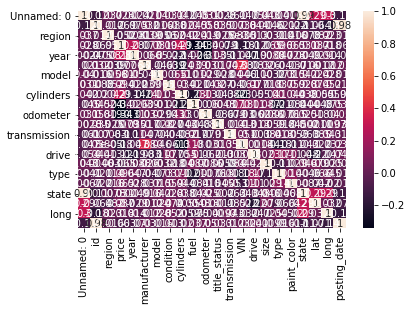

In [58]:
#Visualization
data_final = pd.read_csv('final_vehicles.csv')
df_final = pd.DataFrame(data_final)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_final.columns:
#     df_final[i] = df_final[i].fillna('NaN')
    df_final = df_final.dropna()
    df_final[i] = le.fit_transform(df_final[i])

# split date into year, month, day columns
    
df_final.reset_index(drop = True, inplace = True)
df_final.head()


corrMatrix = df_final.corr()
print(corrMatrix)

import seaborn as sb
import matplotlib.pyplot as plt
sb.heatmap(corrMatrix, annot=True)

from matplotlib.pyplot import figure
# figure(figsize=(90, 60), dpi=80)
# plt.set_size_inches(18.5, 10.5)
plt.savefig('test2png.png', dpi=1000)
plt.show()


## Machine Learning 

In [ ]:
#predict price of used car
#classify manufacturer